# TE Image processing

Import the necessary modules and activate inline plotting.

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

Define two functions for displaying images and plotting histograms.

In [2]:
def show(img):
    # check if the image is color (dim=3) or black and white (dim=2)
    if len(img.shape)==3:
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plot = plt.imshow(img2)
    else:
        plot = plt.imshow(img, cmap='gray')

In [3]:
def histogram(hist, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

## 6 Image processing

(194, 192, 3)


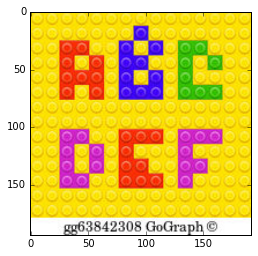

In [4]:
img = cv2.imread("abc.jpg")
print(img.shape)
show(img)

Translate image by (40, 60) and show

In [18]:
h, w = img.shape[:2]
print(h, w)

194 192


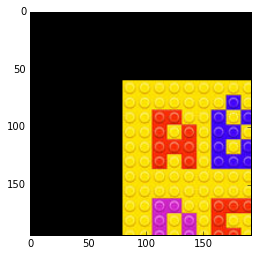

In [17]:
M = np.float32([[1, 0, 80], [0, 1, 60]])
img2 = cv2.warpAffine(img, M, (w, h))
show(img2)

Rotate the output by 45° and show

Flip the previos result horizontally and show

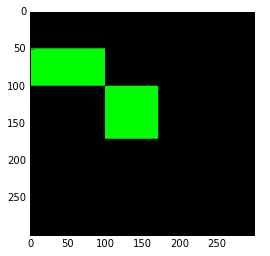

In [7]:
img12 = np.zeros((300, 300, 3), dtype ="uint8")
green = (0, 255, 0)
cv2.rectangle(img12, (100, 100), (170, 170), green, -1)
img12[50:100, 0:100] = (0, 255, 0)
show(img12)

300


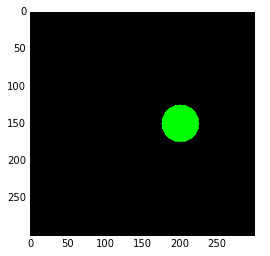

In [8]:
img13 = np.zeros((300, 300, 3), dtype = "uint8")
cv2.circle(img13, (200, 150), 25, green, -1)
show(img13)
print(img13.shape[1])

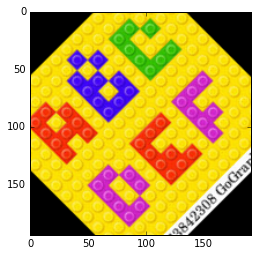

In [16]:
center = (img.shape[1] // 2, img.shape[0] // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
show(rotated)

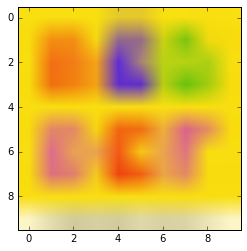

In [44]:
r = 10.0 / img.shape[1]
dim = (10, int(img.shape[0] * r))
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
show(resized)

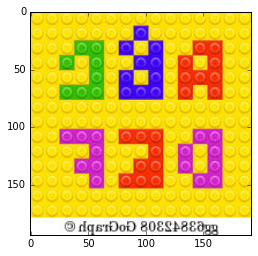

In [26]:
flipped = cv2.flip(img, 1)
show(flipped)

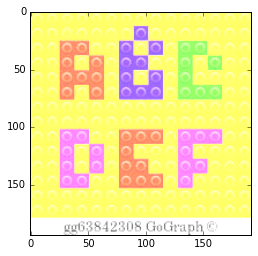

In [30]:
M = np.ones(img.shape, dtype = "uint8") * 100
added = cv2.add(img, M)
show(added)

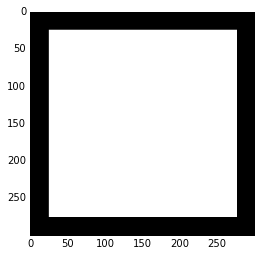

In [54]:
rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 225, -1)
show(rectangle)

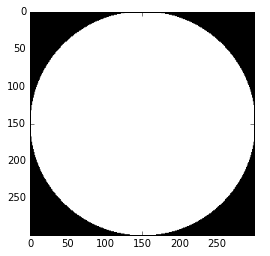

In [59]:
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
show(circle)

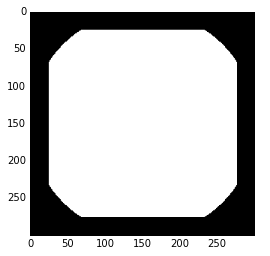

In [60]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
show(bitwiseAnd)

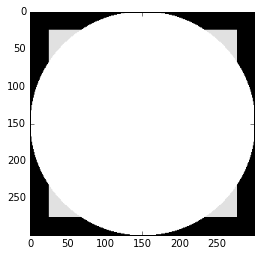

In [61]:
bitwiseOr = cv2.bitwise_or(rectangle, circle)
show(bitwiseOr)

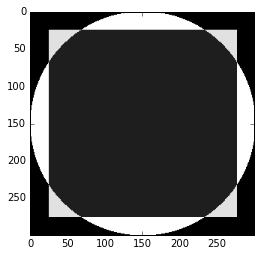

In [62]:
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
show(bitwiseXor)

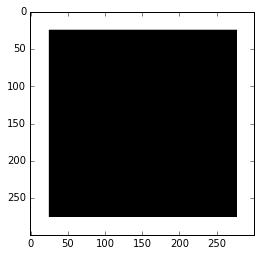

In [63]:
bitwiseNot = cv2.bitwise_not(rectangle)
show(bitwiseNot)

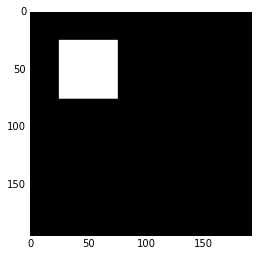

In [68]:
mask = np.zeros(img.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (25, 25), (75 , 75), 255,-1)
show(mask)

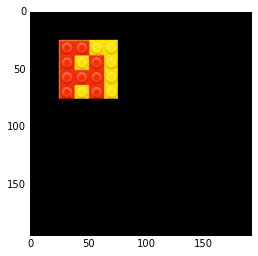

In [69]:
masked = cv2.bitwise_and(img, img, mask = mask)
show(masked)

In [72]:
(B, G, R) = cv2.split(img)
zeros = np.zeros(img.shape[:2], dtype = "uint8")

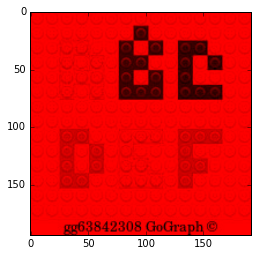

In [74]:
imgR= cv2.merge([zeros, zeros, R])
show(imgR)

## 7 Histograms

Transform to gray-scale image and show

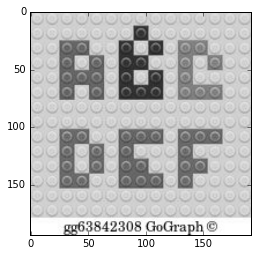

In [75]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray)

Show a histogram

In [76]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

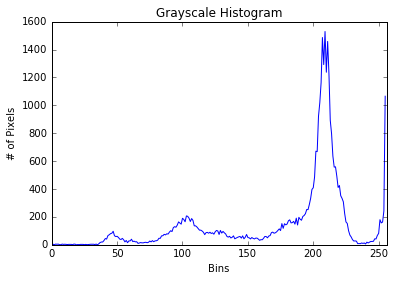

In [77]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

What is the region around
- 50 Le B
- 100 Les lettres A C D E F
- 200 La partie jaune
- 250 La bande blanche en bas de l image

Place a red rectangle around letter A

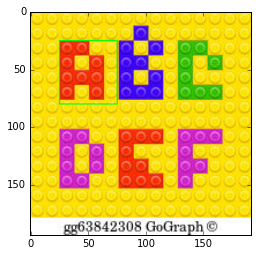

In [78]:
img4 = img.copy()
cv2.rectangle (img4, (25, 25), (75, 80), (0, 255, 0))
show (img4)

Place a red rectangle around letter C

In [ ]:
img3 = img.copy()
cv2.rectangle(img3, (125, 20), (175, 90), (0, 0, 255))
show(img3)

In [ ]:
letter_A = gray[20:90, 25:75]
show(letter_A)

In [ ]:
hist_A = cv2.calcHist([letter_A], [0], None, [256], [0, 256])
histogram(hist_A, "Letter A")

## 8 Smoothing

In [ ]:
show(img)

In [ ]:
img2 = img[0:100, :, :]
print(img2.shape)
show(img2)

Show 3 horizontally stacked blurred images with a blur size of 3, 5, 7

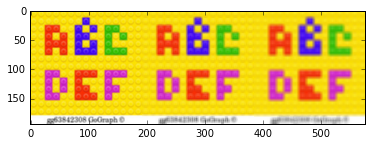

In [9]:
blurred = np.hstack([
    cv2.blur(img, (3,3)),
    cv2.blur(img, (5,5)),
    cv2.blur(img, (7,7))
])
show(blurred)

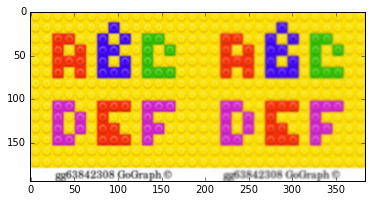

In [79]:
img15 = np.hstack([
    cv2.GaussianBlur(img, (3,3), 0),
    cv2.GaussianBlur(img, (5,5), 0)])
show(img15)

## 9 Thresholding

Transform into grayscale and select appropriate binary threshold, based on previous histogram, to show the letters in black.

In [10]:
show(gray)

NameError: name 'gray' is not defined

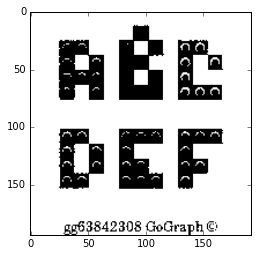

In [80]:
(T, thresh) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
show(thresh)

Show the letters in white (THRESH_BINARY_INV).

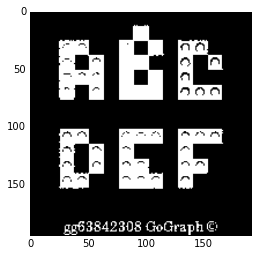

In [81]:
(T, thresh2) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
show(thresh2)

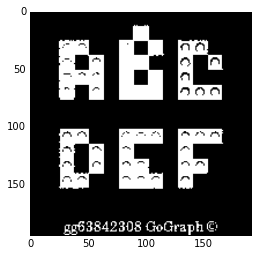

In [83]:
(T, thresh2) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
show(thresh2)

## 10 Edge detection

Blur the grayscale image by (5,5), then use Canny edge detection and show the result.

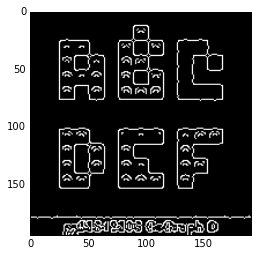

In [86]:
gray2 = cv2.blur(gray, (3, 3))
canny = cv2.Canny(gray2, 100, 150)
show(canny)

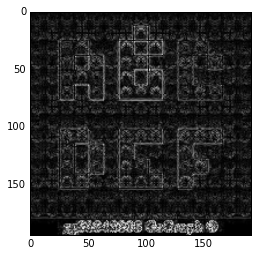

In [85]:
LAPLACE = cv2.Laplacian(gray, cv2.CV_64F)
LAPLACE = np.uint8(np.absolute(img16))
show(LAPLACE)

## 11 Contours

Only use the top 170 pixels

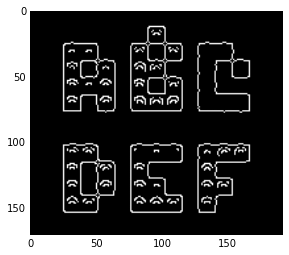

In [66]:
canny2 = canny[0:170, :]
show(canny2)

In [89]:
(_, cnts, _) = cv2.findContours(canny2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(cnts))

6
